In [1]:
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Libraries installed")

Libraries installed


In [2]:
team_stats = leaguedashteamstats.LeagueDashTeamStats(
    season = '2024-25',
    measure_type_detailed_defense = 'Base',
    league_id_nullable='00'
)

teams_df = team_stats.get_data_frames()[0]
print(f"Total teams: {len(teams_df)}")
print("\nColumns available:")
print(teams_df.columns.tolist())
print("\nFirst 5 teams:")
print(teams_df[['TEAM_NAME', 'W', 'L', 'W_PCT']].head())


Total teams: 30

Columns available:
['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']

First 5 teams:
           TEAM_NAME   W   L  W_PCT
0      Atlanta Hawks  40  42  0.488
1     Boston Celtics  61  21  0.744
2      Brooklyn Nets  26  56  0.317
3  Charlotte Hornets  19  63  0.232
4      Chicago Bulls  39  43  0.476


In [3]:
# sort by wins
top_teams = teams_df.nlargest(10, "W")

print("Top 10 teams by Wins:")
print(top_teams[['TEAM_NAME', 'W', 'L', 'W_PCT']].to_string(index=False))

Top 10 teams by Wins:
             TEAM_NAME  W  L  W_PCT
 Oklahoma City Thunder 68 14  0.829
   Cleveland Cavaliers 64 18  0.780
        Boston Celtics 61 21  0.744
       Houston Rockets 52 30  0.634
       New York Knicks 51 31  0.622
        Denver Nuggets 50 32  0.610
        Indiana Pacers 50 32  0.610
           LA Clippers 50 32  0.610
    Los Angeles Lakers 50 32  0.610
Minnesota Timberwolves 49 33  0.598


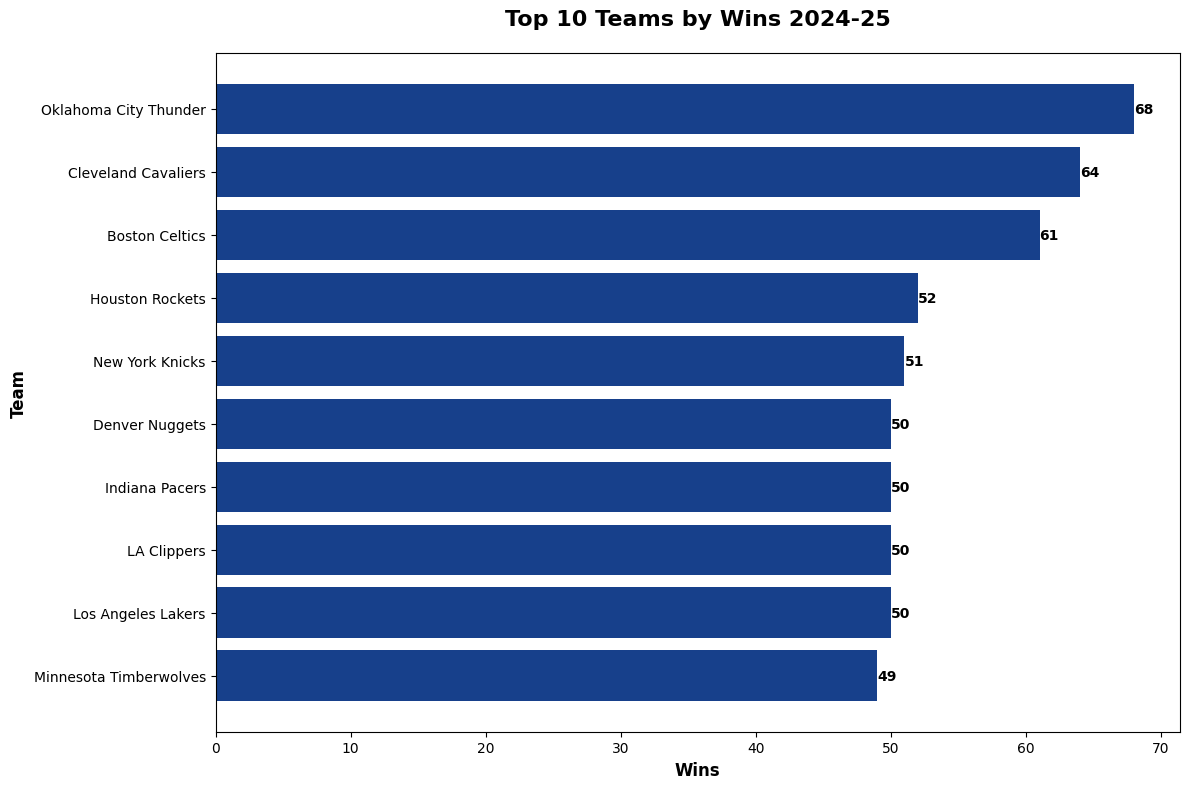

In [4]:
plt.figure(figsize=(12,8))
plt.barh(top_teams['TEAM_NAME'], top_teams['W'], color='#17408B')
plt.xlabel('Wins', fontsize = 12, fontweight = 'bold')
plt.ylabel('Team', fontsize = 12, fontweight = 'bold')
plt.title("Top 10 Teams by Wins 2024-25", fontsize = 16, fontweight = 'bold', pad = 20)
plt.gca().invert_yaxis()

for i, (team, wins) in enumerate(zip(top_teams['TEAM_NAME'], top_teams['W'])):
    plt.text(wins, i, f'{int(wins)}', va = 'center', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.savefig('../visualizations/top_teams.png', dpi = 300, bbox_inches = 'tight')
plt.show()
        

Correlation between Points and Wins: 0.730


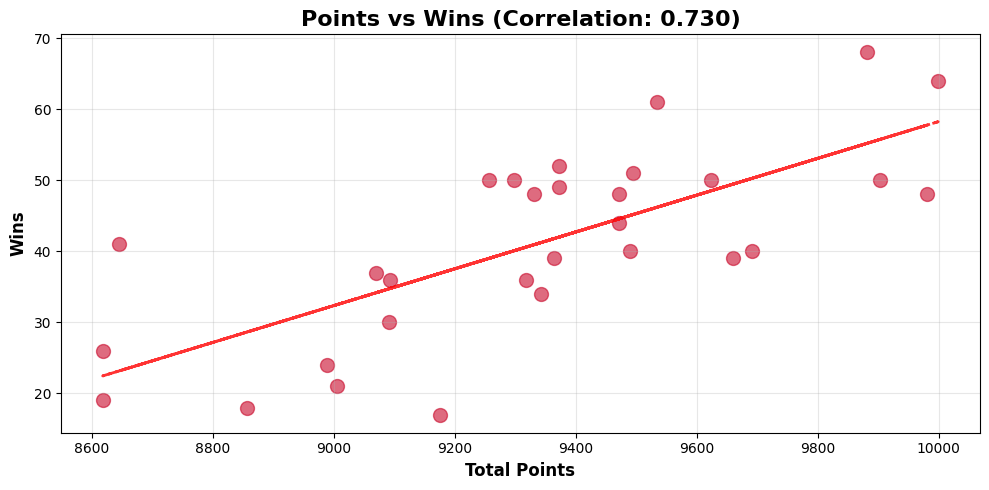

In [5]:
# calculate correlation
correlation = teams_df['PTS'].corr(teams_df['W'])
print(f"Correlation between Points and Wins: {correlation:.3f}")

# scatter plot
plt.figure(figsize = (10,5))
plt.scatter(teams_df['PTS'], teams_df['W'], alpha = 0.6, s = 100, color = '#C9082A')

# trend line
z = np.polyfit(teams_df['PTS'], teams_df['W'], 1)
p = np.poly1d(z)
plt.plot(teams_df['PTS'], p(teams_df['PTS']), "r--", alpha = 0.8, linewidth = 2)

plt.xlabel('Total Points', fontsize = 12, fontweight = 'bold')
plt.ylabel('Wins', fontsize = 12, fontweight = 'bold')
plt.title(f"Points vs Wins (Correlation: {correlation:.3f})", fontsize = 16, fontweight = 'bold')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.savefig('../visualizations/points_wins_correlation.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [6]:
# other correlations
stats_to_check = ['PTS', 'AST', 'REB', 'FG_PCT', 'FG3_PCT']

print("Correlations with Wins:")
for stat in stats_to_check:
    corr = teams_df[stat].corr(teams_df['W'])
    print(f"{stat}: {corr:.3f}")

Correlations with Wins:
PTS: 0.730
AST: 0.303
REB: 0.273
FG_PCT: 0.672
FG3_PCT: 0.670
